In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats 
import seaborn as sns
import os
import re

# For Text processing
from wordcloud import WordCloud, STOPWORDS  
from bs4 import BeautifulSoup as bfs  # used to read in website data
import nltk 
# Lemmatizer reduces words into their root form: wolves -> wolf, jumping -> jump, etc. 
from nltk.stem import WordNetLemmatizer as WNL    
from nltk.corpus import wordnet 
from nltk import pos_tag
from nltk.corpus import stopwords

In [3]:
os.chdir(r'C:\Users\Owner\OneDrive\Research\Tech\DS_Projects\Other\Marketing\Kickstarter\Data')

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df1 = pd.read_csv('live.csv')
df2 = pd.read_csv('most_backed.csv')

In [6]:
df1.head()
df1.shape
df2.head()
df2.shape

Unnamed: 0  amt.pledged                                              blurb  \
0           0      15823.0  \n'Catalysts, Explorers & Secret Keepers: Wome...   
1           1       6859.0  \nA unique handmade picture book for kids & ar...   
2           2      17906.0  \nA horror comedy about a repairman who was in...   
3           3      67081.0  \nThe Johnny Wander autobio omnibus you've all...   
4           4      32772.0  \nThe vision for this project is the establish...   

                                   by country currency  \
0           Museum of Science Fiction      US      usd   
1    Tyrone Wells & Broken Eagle, LLC      US      usd   
2                         Tessa Stone      US      usd   
3                       Johnny Wander      US      usd   
4  Beau's All Natural Brewing Company      RW      cad   

                    end.time         location  percentage.funded  \
0  2016-11-01T23:59:00-04:00   Washington, DC                186   
1  2016-11-25T01:13:33-05:00     Portland, OR                  8   
2  2016-11-23T23:00:00-05:00  Los Angeles, CA                102   
3  2016-11-01T23:50:00-04:00     Brooklyn, NY                191   
4  2016-11-18T23:05:48-05:00   Kigali, Rwanda                 34   

             state                                              title    type  \
0               DC  Catalysts, Explorers & Secret Keepers: Women o...    Town   
1               OR  The Whatamagump (a hand-crafted story picture ...    Town   
2               CA                         Not Drunk Enough Volume 1!    Town   
3               NY  Our Cats Are More Famous Than Us: A Johnny Wan...  County   
4  Kigali Province                   The Rwanda Craft Brewery Project    Town   

                                                 url  
0  /projects/1608905146/catalysts-explorers-and-s...  
1  /projects/thewhatamagump/the-whatamagump-a-han...  
2  /projects/1890925998/not-drunk-enough-volume-1...  
3  /projects/746734715/our-cats-are-more-famous-t...  
4  /projects/beaus/the-rwanda-craft-brewery-proje...

(4000, 13)

Unnamed: 0  amt.pledged                                              blurb  \
0           0    8782571.0  \nThis is a card game for people who are into ...   
1           1    6465690.0  \nAn unusually addicting, high-quality desk to...   
2           2    5408916.0  \nBring Reading Rainbow’s library of interacti...   
3           3    5702153.0  \nUPDATED: This is it. We're making a Veronica...   
4           4    3336371.0  \nAn adventure game from Tim Schafer, Double F...   

                                     by        category currency       goal  \
0                              Elan Lee  Tabletop Games      usd    10000.0   
1            Matthew and Mark McLachlan  Product Design      usd    15000.0   
2        LeVar Burton & Reading Rainbow             Web      usd  1000000.0   
3                            Rob Thomas  Narrative Film      usd  2000000.0   
4  Double Fine and 2 Player Productions     Video Games      usd   400000.0   

            location  num.backers  \
0    Los Angeles, CA       219382   
1         Denver, CO       154926   
2    Los Angeles, CA       105857   
3      San Diego, CA        91585   
4  San Francisco, CA        87142   

                                    num.backers.tier  \
0                            [15505, 202934, 200, 5]   
1  [788, 250, 43073, 21796, 41727, 21627, 12215, ...   
2  [19639, 14343, 9136, 2259, 5666, 24512, 4957, ...   
3  [5938, 8423, 11509, 22997, 23227, 1865, 7260, ...   
4  [47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]   

                                         pledge.tier  \
0                         [20.0, 35.0, 100.0, 500.0]   
1  [1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...   
2  [5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....   
3  [1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...   
4  [15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...   

                                               title  \
0                                  Exploding Kittens   
1                      Fidget Cube: A Vinyl Desk Toy   
2  Bring Reading Rainbow Back for Every Child, Ev...   
3                    The Veronica Mars Movie Project   
4                              Double Fine Adventure   

                                                 url  
0                /projects/elanlee/exploding-kittens  
1   /projects/antsylabs/fidget-cube-a-vinyl-desk-toy  
2  /projects/readingrainbow/bring-reading-rainbow...  
3  /projects/559914737/the-veronica-mars-movie-pr...  
4         /projects/doublefine/double-fine-adventure

(4000, 13)

In [7]:
# EDA on datasets 
df1.columns
df2.columns
print("Unique values") 
df2.nunique(axis=0)   # num of unique values for each column 

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'country', 'currency',
       'end.time', 'location', 'percentage.funded', 'state', 'title', 'type',
       'url'],
      dtype='object')

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url'],
      dtype='object')

Unique values


Unnamed: 0          4000
amt.pledged         3968
blurb               3975
by                  3137
category             115
currency               9
goal                 348
location             806
num.backers         2361
num.backers.tier    3993
pledge.tier         3973
title               3990
url                 3993
dtype: int64

In [12]:
# Examine counts for project creators 
by_counts = pd.DataFrame(df2.by.value_counts()).reset_index()  
by_counts.by.describe()   # statistics on count by project creator 
by_counts.columns = ['project_creator','count']
by_counts.head(10)

count    3137.000000
mean        1.275104
std         1.035343
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        24.000000
Name: by, dtype: float64

project_creator  count
0       CoolMiniOrNot     24
1      Michael Mindes     20
2      Richard Thomas     17
3              Travis     14
4        Mantic Games     12
5         Game Salute     12
6          Seth Hiatt     11
7         Queen Games     10
8        sekaiproject     10
9  Dice Hate Me Games      8

In [13]:
# Aggregate: Category level 
cat_valcount = pd.DataFrame(df2.category.value_counts())
cat_valcount.reset_index(level=0, inplace=True)
cat_valcount.columns = ['category','value_count']
cat_valcount.head()
df2['avg_pledge'] = df2["amt.pledged"] / df2['num.backers']    #average pledge per campaign  
    # reset_index turns category into a field (instead of an index). 
avg_pledge_cat = df2.groupby("category").apply(lambda x: np.mean(x['amt.pledged']/x['num.backers'])).reset_index()
avg_pledge_cat.columns=['category','avg_pledge_backer']
avg_pledge_cat.head()

category  value_count
0  Product Design          773
1  Tabletop Games          742
2     Video Games          524
3        Hardware          182
4      Technology          152

category  avg_pledge_backer
0  3D Printing         216.639694
1     Academic          62.610541
2  Accessories          66.062813
3       Action          35.568170
4    Animation          71.048812

In [14]:
# process pledged over goal 
df2['pledged_vgoal'] = df2['amt.pledged'] / df2['goal']
df2.loc[df2.by=='Jack Stratton','pledged_vgoal'] = np.mean(df2.pledged_vgoal)
pledged_vgoal = df2.groupby('category')['pledged_vgoal'].mean().reset_index()
pledged_vgoal.head()

category  pledged_vgoal
0  3D Printing      15.659178
1     Academic       1.219653
2  Accessories      13.772044
3       Action       3.150095
4    Animation       2.677809

In [15]:
# merge category level aggregations 
cat_groups = pd.merge(avg_pledge_cat, pledged_vgoal.merge(cat_valcount,on='category'), on='category', how='left')
cat_groups_highval = cat_groups[cat_groups.value_count >= 40]  # isolate only highest frequency values 
len(cat_groups_highval) 

16

In [16]:
df2.pledged_vgoal.describe()
df2.avg_pledge.describe()

count     4000.000000
mean        30.262853
std        760.471517
min          1.000000
25%          2.009917
50%          4.580225
75%         10.515050
max      41535.000000
Name: pledged_vgoal, dtype: float64

count    4000.000000
mean       82.471575
std        95.683045
min         1.460546
25%        35.763599
50%        54.960326
75%        91.595576
max      1854.417266
Name: avg_pledge, dtype: float64

Text(0.5, 1.0, 'Average Pledge/Backer vs. Category  Top Freq Category')

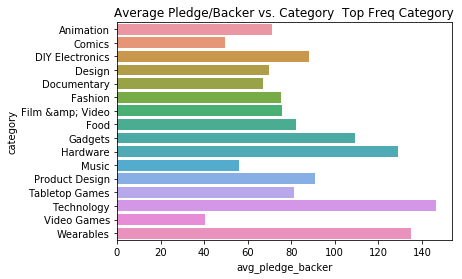

In [17]:
# plot Average pledge/backer against categories for high frequency categories
sns.barplot(x='avg_pledge_backer', y = 'category', 
            data=cat_groups_highval).set_title("Average Pledge/Backer vs. Category  Top Freq Category")

Top Avg. Pledge / Backer by Backer 


category  avg_pledge_backer  pledged_vgoal  value_count
41               Flight         287.927413      11.215962            6
91            Sculpture         281.684397      11.440762            4
103           Thrillers         220.627964       1.958722            2
0           3D Printing         216.639694      15.659178           23
47      Gaming Hardware         209.945873       7.878838            6
62          Mixed Media         202.962145      20.493231            5
13     Camera Equipment         196.251683      10.181887           26
87               Robots         170.822732      29.581179           18
100          Technology         146.360740      10.131374          152
95                Sound         146.322982       9.403172           26
8          Architecture         141.114245       3.283888            2
56   Interactive Design         137.706212       3.931860            2

Text(0.5, 1.0, 'Average Pledge/Backer vs. Category: ranked by Avg. PLedge')

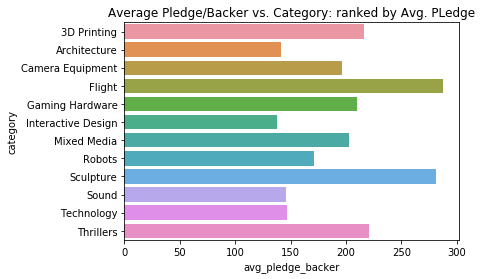

In [18]:
# Plot by top average pledge/backer fields 
    # isolate top average pledges by percentile 
tgt_perc = 90   # choose percentile 
percentile_val_avgpledge = np.percentile(cat_groups['avg_pledge_backer'], tgt_perc)
cat_groups_toppledge_backer = cat_groups[cat_groups['avg_pledge_backer']>=percentile_val_avgpledge] 
    # show table 
print("Top Avg. Pledge / Backer by Backer ")  
cat_groups_toppledge_backer.sort_values(by = ['avg_pledge_backer'], ascending=False)
sns.barplot(x = 'avg_pledge_backer', y='category', 
            data=cat_groups_toppledge_backer).set_title("Average Pledge/Backer vs. Category: ranked by Avg. PLedge")

Top Performance: Pledged / Backer


category  avg_pledge_backer  pledged_vgoal  value_count
84   Radio &amp; Podcasts          50.123652    2097.643040           11
51                Hip-Hop          45.606230     162.405903            5
46                  Games          78.204583     146.843614           37
42                   Food          82.160857     131.916562           46
107           Video Games          40.367670      82.172159          524
7                    Apps          39.043396      59.123833           17
85          Ready-to-wear          70.097185      49.702400            3
23              Cookbooks          41.104055      32.134043            7
87                 Robots         170.822732      29.581179           18
104            Typography          60.291638      21.316688            2
62            Mixed Media         202.962145      20.493231            5
99         Tabletop Games          81.041378      18.861807          742

Text(0.5, 1.0, 'Top Performance (Pledged / Goal)')

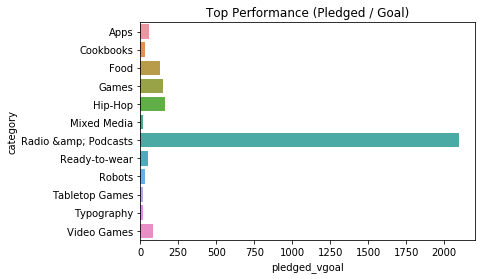

In [30]:
# Plot by performance fields (pledged / goal)
    # isolate top average pledges by percentile 
percentile_val_pledgedvgoal = np.percentile(cat_groups['pledged_vgoal'], tgt_perc)
cat_groups_pledgevgoal = cat_groups[cat_groups['pledged_vgoal']>=percentile_val_pledgedvgoal] 
    # show table 
print("Top Performance: Pledged / Backer")  
cat_groups_pledgevgoal.sort_values(by = ['pledged_vgoal'], ascending=False)
sns.barplot(x = 'pledged_vgoal', y='category', 
            data=cat_groups_pledgevgoal).set_title("Top Performance (Pledged / Goal)")
# sns.plt.title("Average Pledge/Backer vs. Category: ranked by Avg. PLedge")

In [21]:
# df_piv = pd.pivot_table(df2, index='category',values='amt.pledged')
df_piv = pd.pivot_table(df2, index='category',values='amt.pledged').reset_index()  
type(df_piv); df_piv.columns

pandas.core.frame.DataFrame

Index(['category', 'amt.pledged'], dtype='object')

In [22]:
len(df2.currency.unique())
df2.columns
df2.by.value_counts().head(20)

9

Index(['Unnamed: 0', 'amt.pledged', 'blurb', 'by', 'category', 'currency',
       'goal', 'location', 'num.backers', 'num.backers.tier', 'pledge.tier',
       'title', 'url', 'avg_pledge', 'pledged_vgoal'],
      dtype='object')

CoolMiniOrNot                        24
Michael Mindes                       20
Richard Thomas                       17
Travis                               14
Mantic Games                         12
Game Salute                          12
Seth Hiatt                           11
Queen Games                          10
sekaiproject                         10
Dice Hate Me Games                    8
David B. Talton Jr.                   8
IronSpike                             7
Gamelyn Games                         7
Cheapass Games                        7
Fred Hicks / Evil Hat Productions     7
Monte Cook Games                      7
Don Moyer                             7
GreaterThanGames                      6
Jackson Robinson                      6
Dan Provost & Tom Gerhardt            6
Name: by, dtype: int64

In [24]:
# test loop to break apart lists into seperate lines 
def flat_len_list(df, list_column): 
    len_list = []
    for fld_row in range(df.shape[0]):
        rec = df[list_column][fld_row][1:-1]   # remove open/close brackets from list 
        rec_split = rec.split(',') 
        len_list.append(len(rec_split))
    return len_list 

def flatten_list_df(df, list_column): 
    t_list = []
    for fld_row in range(df.shape[0]):
        rec = df[list_column][fld_row][1:-1]   # remove open/close brackets from list 
        rec_split = rec.split(',') 
        for x in rec_split:
            t_list.append(x)
    return t_list 

flat_pledge = flatten_list_df(df2, "pledge.tier")
flat_backers = flatten_list_df(df2, "num.backers.tier")

In [25]:
# Function to flatten og dataset and add flat fields 
def expand_df_flatten(df, list_column, new_column):
    lens_of_lists = flat_len_list(df, list_column) 
    origin_rows = range(df.shape[0])   # range object for no. of rows: 4k rows 
    """ create array marking each digit with its row. 
    For instance first list (row zero) has 26 digits, 2nd list 75 digits. 3rd list has 457 digits 
    destination rows will have 26 0's, 75 1's, 457 2's.... 
    This will be used for number of row copies. 
    """
    destination_rows = np.repeat(origin_rows, lens_of_lists)
        # create DF excluding list column 
    non_list_cols = (
      [idx for idx, col in enumerate(df.columns)
       if col != list_column]
    )
    expanded_df = df.iloc[destination_rows, non_list_cols].copy()
    expanded_df[new_column] = flatten_list_df(df, list_column) 
    return expanded_df

In [26]:
# First flatten pledge tier then add flatted num of backers lists 
df2_exp = expand_df_flatten(df2, "pledge.tier", "pledge_tier2")
df2_exp['num_backers'] = flatten_list_df(df2, "num.backers.tier")
df2_exp.shape

(57996, 16)

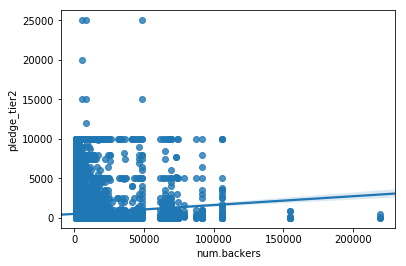

In [27]:
# Scatterplot of num_backers per pledge Tier 
df2_exp['pledge_tier2'] = pd.to_numeric(df2_exp['pledge_tier2'], errors='coerce')  # convert pledge_tiers to numbers 
sns.regplot(x=df2_exp['num.backers'], y=df2_exp['pledge_tier2'])

In [44]:
# WordCloud visualization function
def wordcloud_vis(text_array):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(text_array))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

WordCloud for Fashion Top Backers 


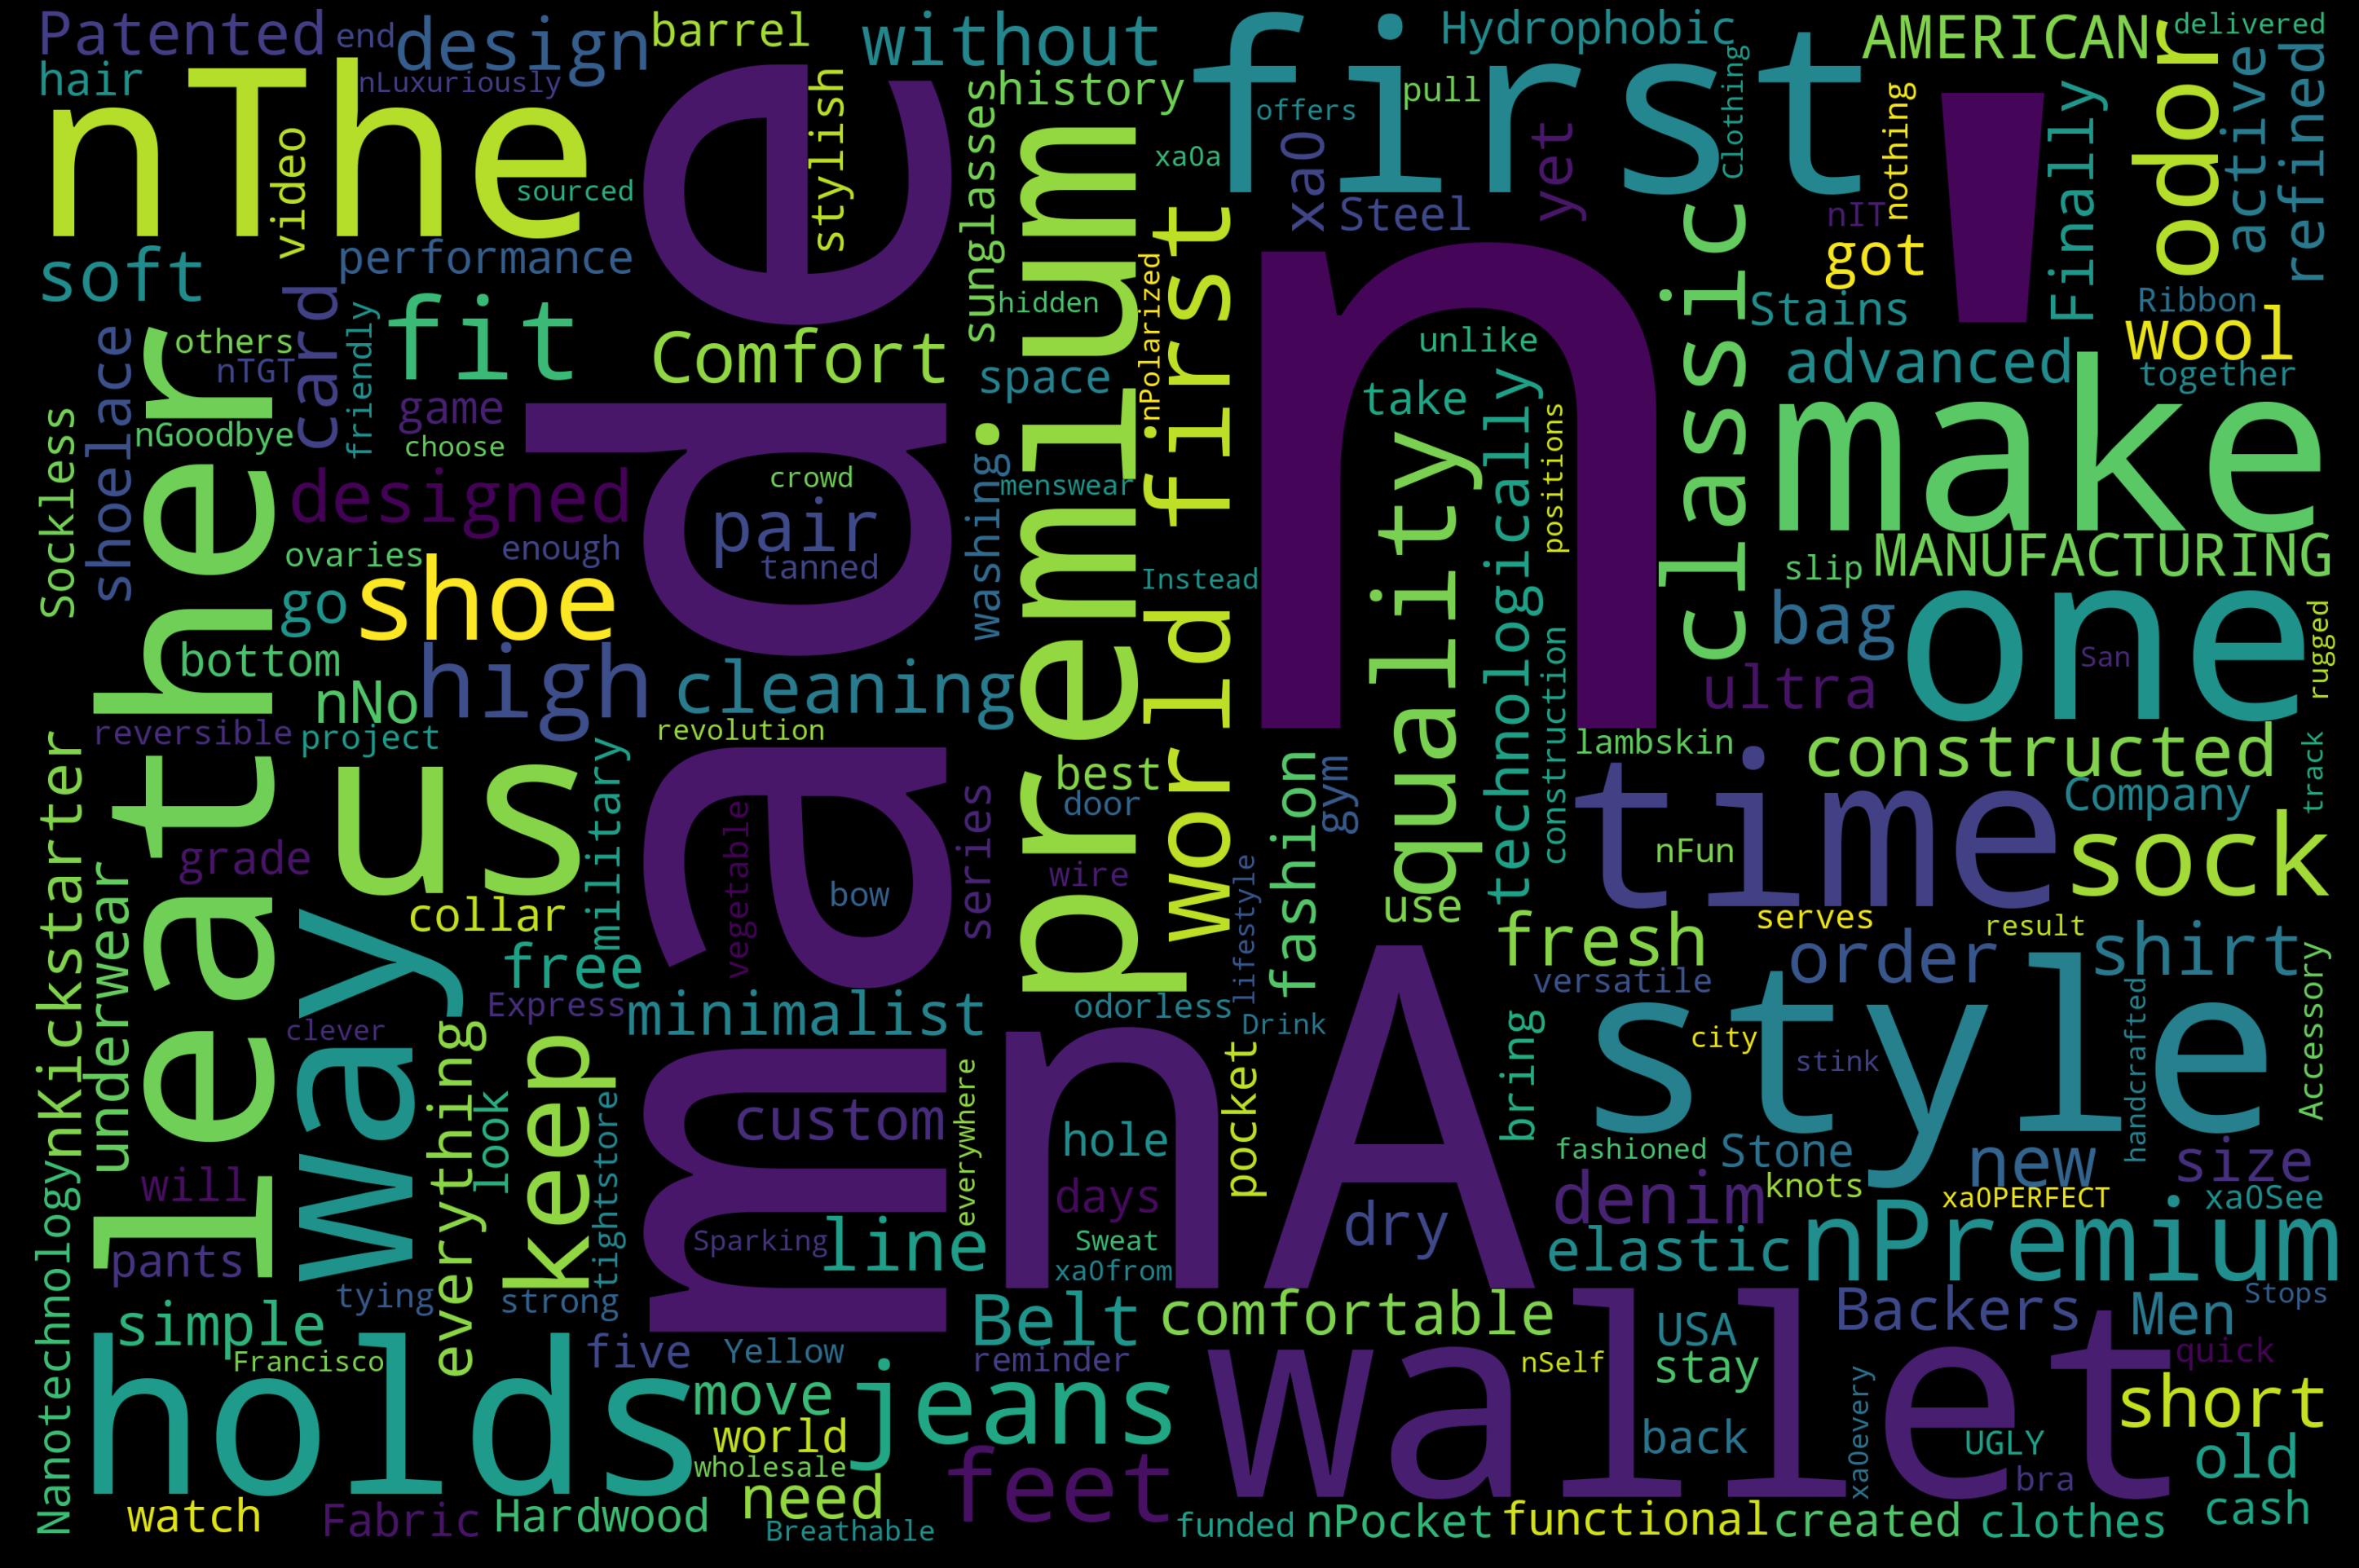

In [36]:
# WordCloud of top backers in Fashion only 
    # Blurbs for Fashion category
df_fashion = df2[df2.category=='Fashion']
text = df_fashion.blurb.values
print("WordCloud for Fashion Top Backers ")
wordcloud_vis(text)

Number of projects 31


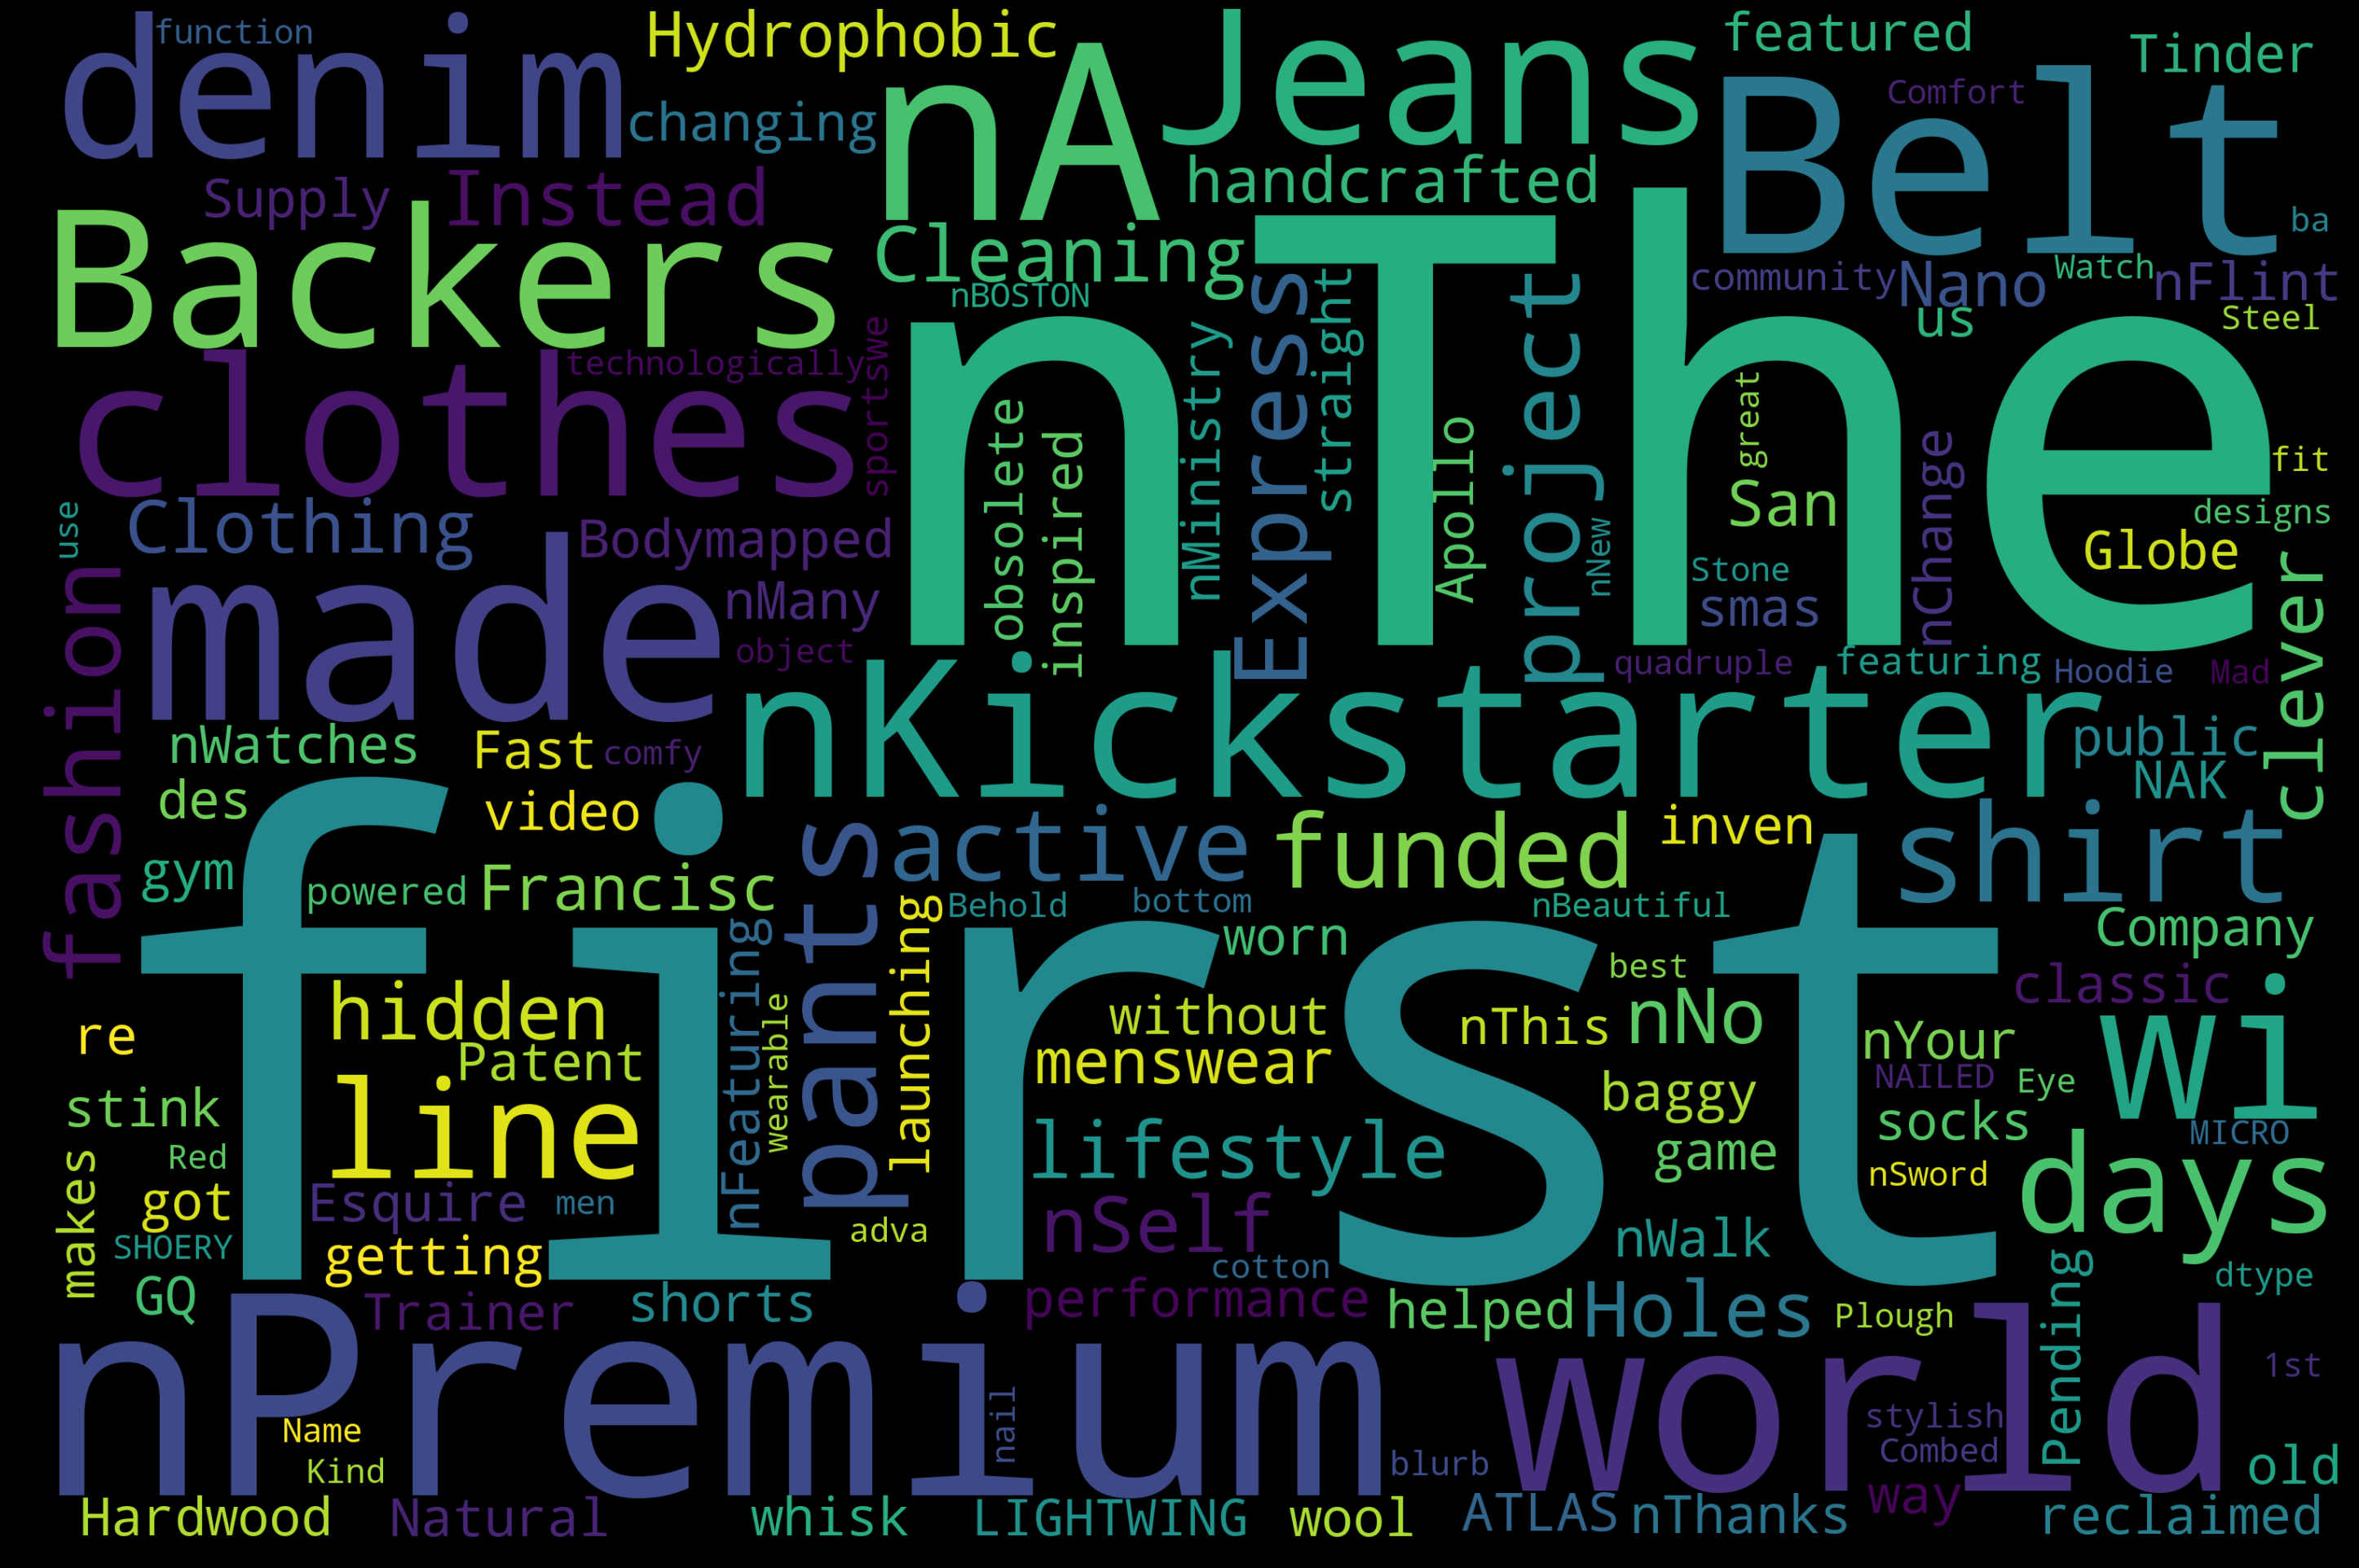

In [47]:
# WorldCloud for highest average pledge within Fashion
    # isolate top average / backer by percentile 
tgt_perc_fashion = 50
perc_avgback_fashion = np.percentile(df2.avg_pledge[df2.category=='Fashion'], tgt_perc_fashion)
text = df2.blurb[(df2.category=='Fashion') & (df2.avg_pledge>=perc_avgback_fashion)] 
print("Number of projects", len(text))
wordcloud_vis(text)

Number of projects 31


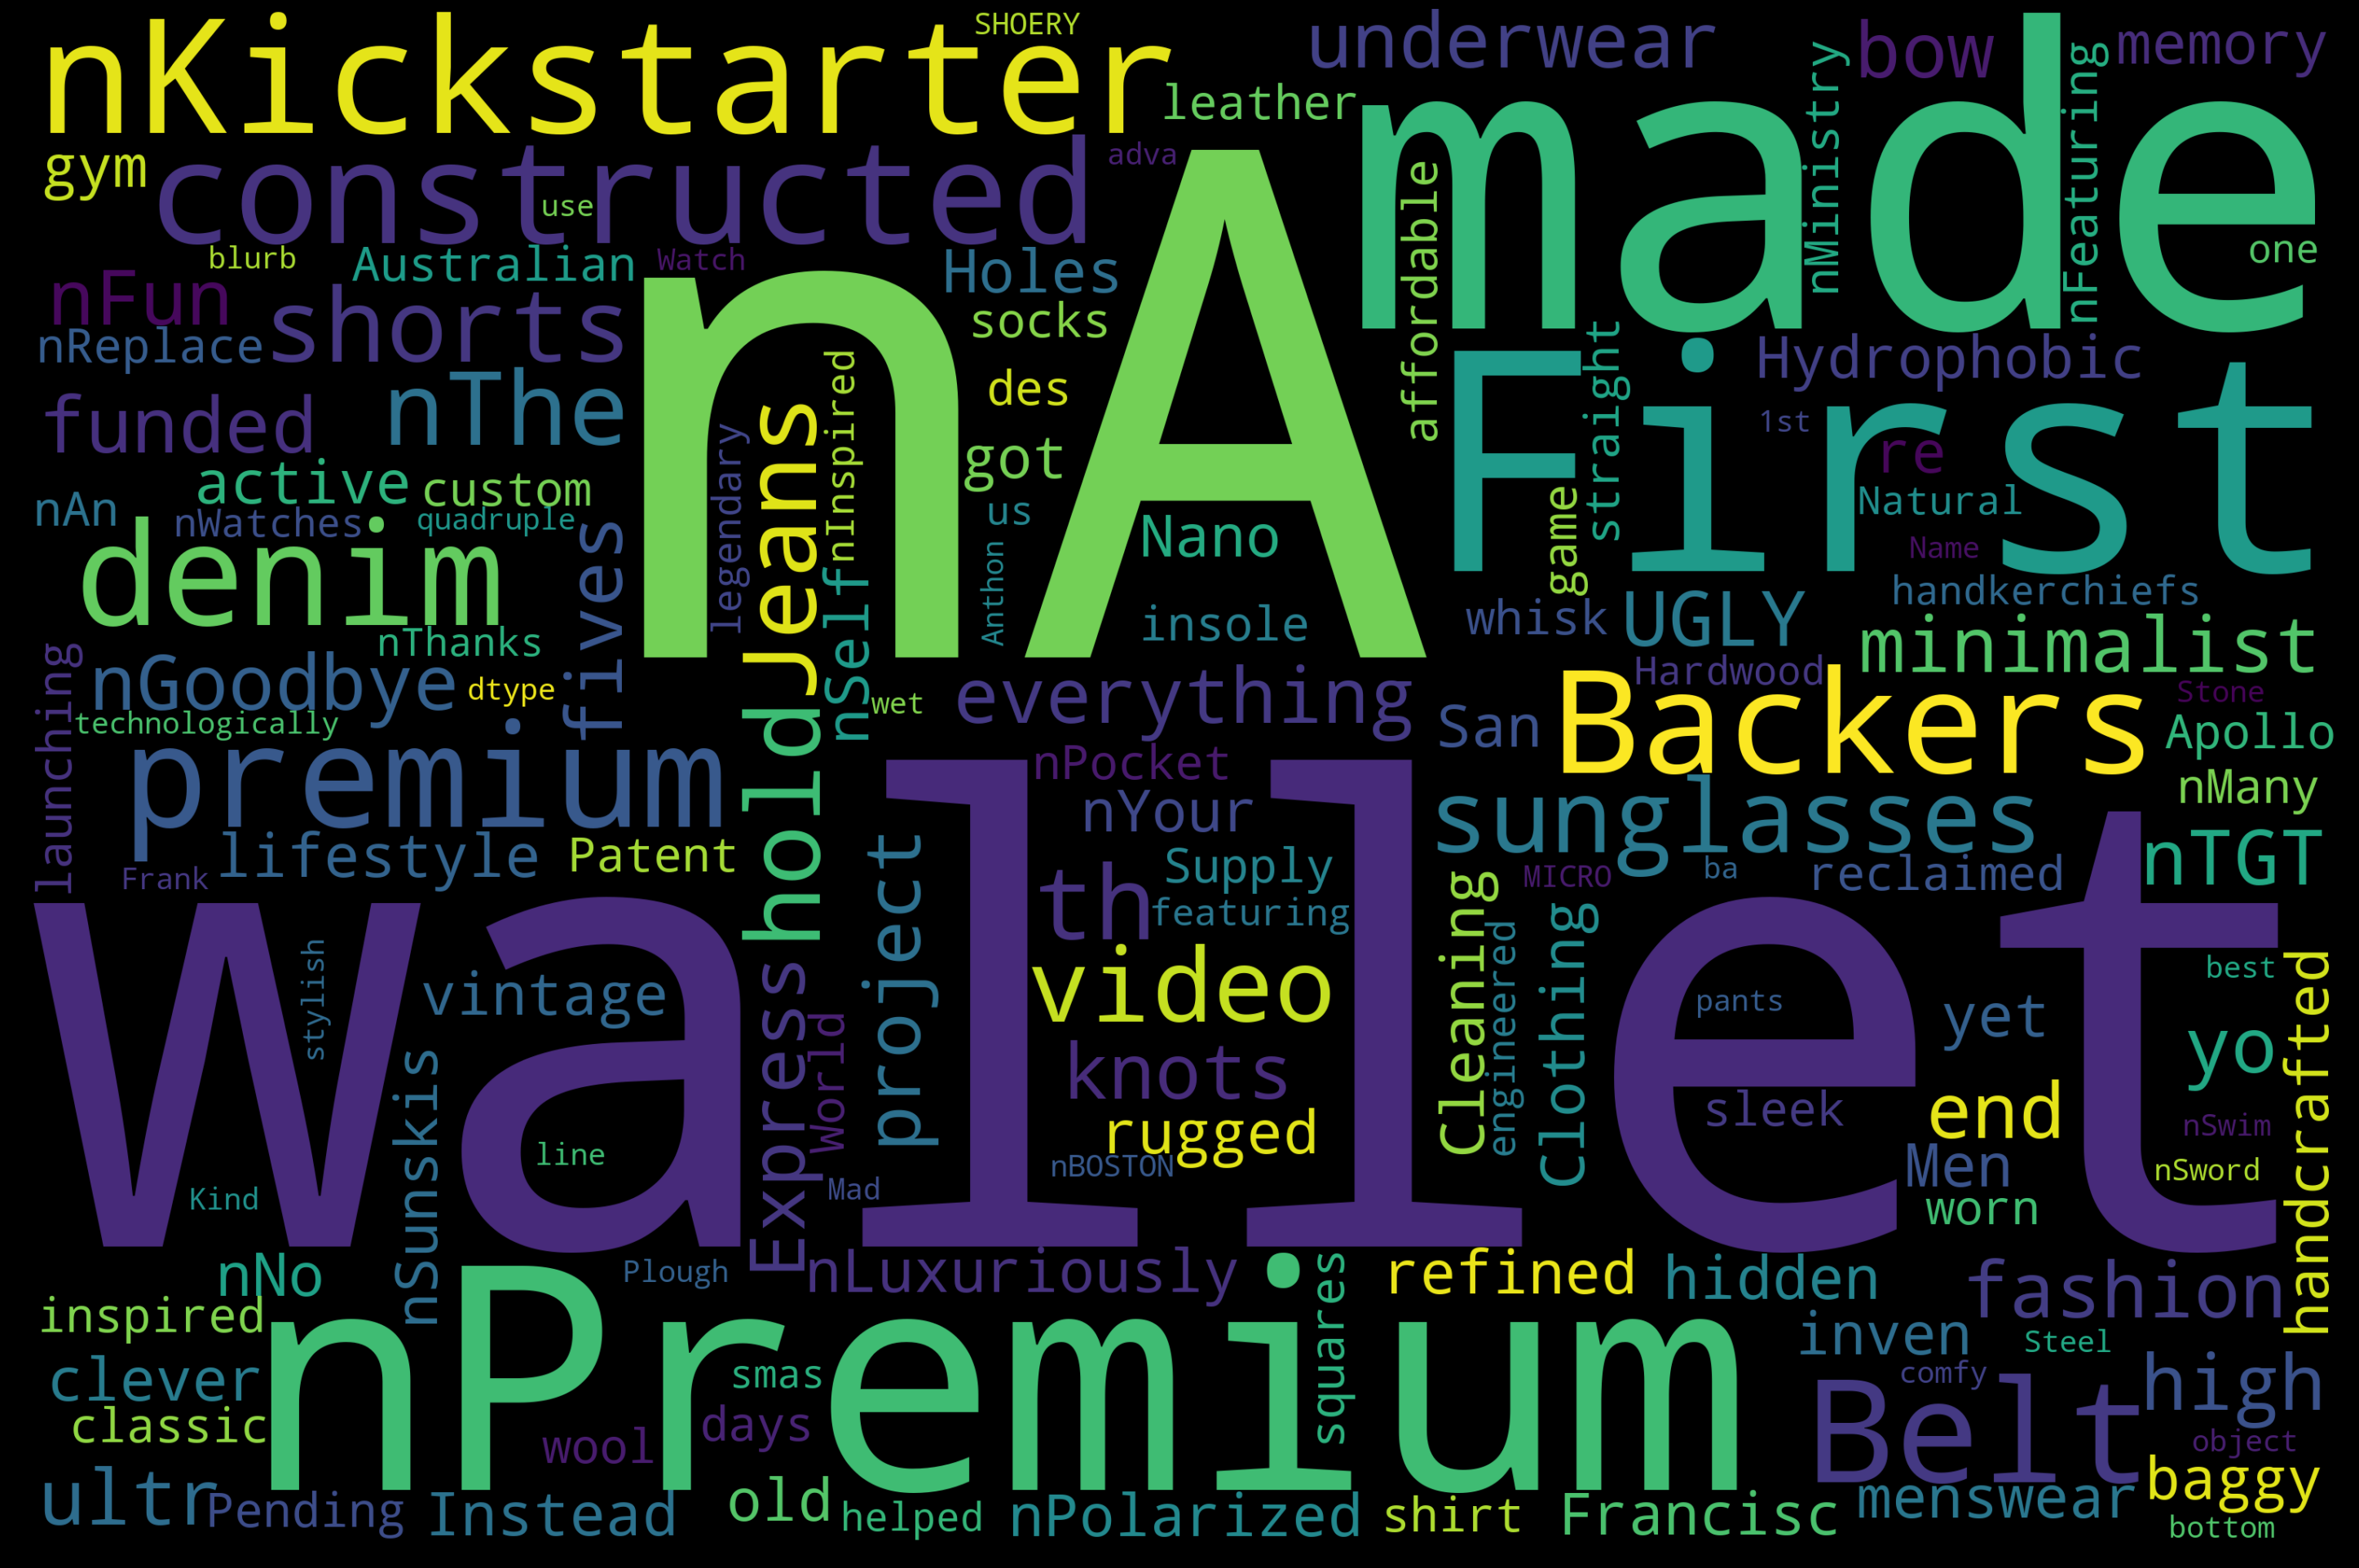

In [50]:
# WorldCloud for highest 'Pledge over Goal' within Fashion
    # isolate top average / backer by percentile 
perc_pledgevgoal_fashion = np.percentile(df2.pledged_vgoal[df2.category=='Fashion'], tgt_perc_fashion)
text = df2.blurb[(df2.category=='Fashion') & (df2.pledged_vgoal>=perc_pledgevgoal_fashion)] 
print("Number of projects", len(text))
wordcloud_vis(text)